# 🚜Predicting the Sale Price of Bulldozers using Machine Learning🚜

In this notebook, we go through an example machine learning project with the goal of predicting the sale price of bulldozers.

## 1. Problem Definition

> Predict the auction sale price for a piece of heavy equipment to create a "blue book" for bulldozers, given its characteristics and previous examples of how similar bulldozers have been sold for.

## 2. Data

The data is downloaded from The Kaggle Bluebook for bulldozers competition:

There are 3 main datasets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. 
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012.

Link: https://www.kaggle.com/c/bluebook-for-bulldozers/data?select=Test.csv

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more information: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**Note: Goal for most regression evaluation metrics is to minimize the error. Exa: our goal for this project will be to build a machine learning model that minimises RMSLE.**

## 4. Features

Kaggle provides a data dictionary detailing all of the features of dataset. The data dictionary can be viewed here on Google Sheets: https://docs.google.com/spreadsheets/d/1HfrcwrBdELDAapUJOiL88Rq87WIVuso8Cf9ZWE6tqZ0/edit?usp=sharing

In [3]:
# Import the required tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

If `low_memory=False` , then whole columns will be read in first, and then the proper types determined. For example, the column will be kept as objects (strings) as needed to preserve information

In [4]:
# Import training & validation sets
df = pd.read_csv("TrainAndValid.csv",
                low_memory=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [6]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [7]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

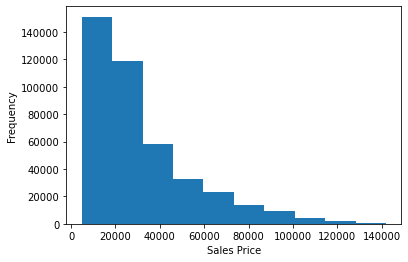

In [6]:
# Plotting the target variable
df.SalePrice.plot.hist()
plt.xlabel("Sales Price");

### Parsing Dates

While working with time-series data, we want to enrich the time & date component as much as possible.

It can be done by telling pandas which of our columns has dates in it using `parse_dates` parameters.

datetime – Its a combination of date and time along with the attributes year, month, day, hour, minute, second, microsecond, and tzinfo.

Parse method: tries to convert the string representation of a date and time value to its DateTime equivalent. So its separated into more easily processed components

In [8]:
# Import data again but with parse dates
df = pd.read_csv("TrainAndValid.csv",
                low_memory=False,
                parse_dates=["saledate"])

In [9]:
df.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

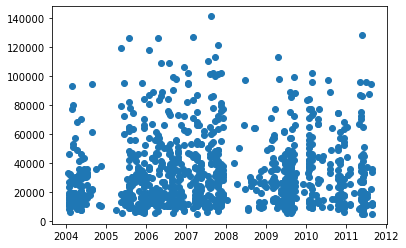

In [9]:
fig, ax = plt.subplots()

ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

In [10]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Sort DataFrame by saledate

When working with time series data, it is good idea to sort it by date

In [10]:
# Sort DataFrame in date order
df.sort_values(["saledate"],
              inplace=True,
              ascending=True)

In [11]:
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame

We make a copy of original dataframe so when we manipulate the the copy, we still have our original data.

In [12]:
# Make a copy of original dataframe to perform edits on it
df_temp = df.copy()

## Feature Engineering

Creating new feature or making changes to existing features

### Add datetime parameters for `saledate` column

In [13]:
df_temp["saleYear"] = df_temp["saledate"].dt.year
df_temp["saleMonth"] = df_temp["saledate"].dt.month
df_temp["saleDay"] = df_temp["saledate"].dt.day
df_temp["saleDayofWeek"] = df_temp["saledate"].dt.dayofweek
df_temp["saleDayofYear"] = df_temp["saledate"].dt.dayofyear

In [14]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofWeek,saleDayofYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [15]:
# Now we have enriched our DataFrame with datetime features, we can remove them
df_temp.drop("saledate", axis=1, inplace=True)

In [16]:
# Check values of different columns
df_temp["state"].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5. Modelling

We have done EDA, lets start to do model-driven EDA.

### Convert strings to categories

One way to convert all of our data into numbers is by converting them into pandas categories.

We can check datatypes compatible with pandas here: https://pandas.pydata.org/docs/reference/general_utility_functions.html

In [17]:
# Find columns which contains strings
df_temp_columns = list(df_temp.columns)

for content in df_temp_columns:
    
    if pd.api.types.is_string_dtype(df_temp[content]) == True:
        print(content)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


Ordered categorical variables are category variables that have a quantitative dimension that can be ordered but is not on a regular scale.

cat = category

If categorical data is ordered then the order of the categories has a meaning and certain operations are possible.

If the categorical is unordered, .min()/.max() will raise a TypeError.

In [18]:
# Turn all of string value into category values
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [19]:
df_temp.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [20]:
# Pandas now treat these strings as numbers
df_temp["state"].cat.as_ordered()

205615         Texas
274835       Florida
141296       Florida
212552       Florida
62755        Florida
             ...    
410879    California
412476    California
411927    California
407124    California
409203    California
Name: state, Length: 412698, dtype: category
Categories (53, object): ['Alabama' < 'Alaska' < 'Arizona' < 'Arkansas' ... 'Washington DC' < 'West Virginia' < 'Wisconsin' < 'Wyoming']

In [21]:
# Check missing data
df_temp.isnull().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save preprocessed data

In [22]:
# Export current tmp dataframe
df_temp.to_csv("train_temp.csv",
              index=False)

In [23]:
# Import preprocessed data
df_temp = pd.read_csv("train_temp.csv", low_memory=False)

### Fill missing values

### Fill numerical values first

In [24]:
# Check for numeric values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofWeek
saleDayofYear


In [25]:
# Check if numeric columns have null values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [26]:
# Fill numeric rows with median
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum(): # True if even a single value is missing
            # Add a binary colum saying if data was missing
            df_temp[label + "_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df_temp[label] = content.fillna(content.median())

***We use median because median is more robust than mean***

In [27]:
# Demonstrate how median is more robust than mean
hundred = np.full((1,1000),100) # Creates an array of 100
hundred_billion = np.append(hundred, 1000000000)
np.mean(hundred), np.mean(hundred_billion), np.median(hundred), np.median(hundred_billion)

(100.0, 999100.8991008991, 100.0, 100.0)

In [28]:
# Check if there is any numeric values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [29]:
# Check to see how many examples were missing
df_temp["auctioneerID_is_missing"].value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

## Filling & turning categorical variables into numbers

In [31]:
# Check the categorical columns that have missing values
for label, contents in df_temp.items():
    if not pd.api.types.is_numeric_dtype(label):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls
saleYear
saleMonth
saleDay
saleDayofWeek
saleDayofYear
auctioneerID_is_missing
MachineHoursCurrentMeter_is_missing


In [32]:
# Turn categorical variables into numbers & fill missing values
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample has missing value
        df_temp[label + "_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1, as we dont want any value to be -ve
        df_temp[label] = pd.Categorical(content).codes+1

In [33]:
# To get the number of states in categorical column
pd.Categorical(df_temp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

**All of our data is numeric & doesnt have non-numeric values, we should be able to build a machine learning model**

In [34]:
%%time
# Instanciate model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

# Fit the model
model.fit(df_temp.drop("SalePrice", axis=1), df_temp["SalePrice"])

CPU times: total: 24min 53s
Wall time: 3min 49s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [35]:
# Score the model
model.score(df_temp.drop("SalePrice", axis=1), df_temp["SalePrice"])

0.9875468079970562

In [44]:
df_temp["saleYear"].value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [45]:
# Split the data into train & validation
df_val = df_temp[df_temp.saleYear == 2012]
df_train = df_temp[df_temp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [46]:
# Split the data into X & y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

## Building an evaluation function

In [47]:
# Create evaluation function
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    
    """
    Calculates root mean squared log error between predictions & true labels.
    
    """
    
    return np.sqrt(mean_squared_log_error(y_test, y_preds))
    
# Create function to evaluate model on few different levels
def show_scores(model):
    
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    # Must see a little worst score on valid values
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
             "Valid MAE": mean_absolute_error(y_valid, val_preds),
             "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
             "Training R^2": r2_score(y_train, train_preds),
             "Valid R^2": r2_score(y_valid, val_preds)}
    
    return scores

## Testing our model on subset (to tune hyperparameters)

max samples: change the number of samples taken

In [40]:
# Change max samples value
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=10000)

In [41]:
%%time
# Cutting down the max no. of samples each estimator can see improved time
model.fit(X_train, y_train)

CPU times: total: 50.2 s
Wall time: 10.5 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [42]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

### Hyperparameter tuning with RandomizedSearchCV

In [43]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Grid of hyperparameters
rf_grid = {"n_estimators":np.arange(10,100,10),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2),
          "max_features": [0.5,1,"sqrt","auto"],
          "max_samples":[1000]}

# Instanciate RandomizedSearchCV
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                      random_state=42),
                                rf_grid,
                                n_iter=5,
                             cv=5,
                             verbose=True)

# Fit the randomizedsearchcv model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
CPU times: total: 1min 19s
Wall time: 1min 32s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [1000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [44]:
# FInd the best hyperparameters
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_samples': 1000,
 'max_features': 0.5,
 'max_depth': None}

In [45]:
# Evaluate the RandomizedSearchCV model
show_scores(rs_model)

{'Training MAE': 8106.159767335027,
 'Valid MAE': 9757.350659761227,
 'Training RMSLE': 0.3583292967294449,
 'Valid RMSLE': 0.3976155989008028,
 'Training R^2': 0.7306539613231294,
 'Valid R^2': 0.7267790008385826}

### Train a model with best hyperparameters

**Note**: They were found after 100 iterations of RandomizedSearchCV

In [46]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators = 70,
                             min_samples_split = 2,
                             min_samples_leaf = 9,
                             max_features = 'auto',
                             max_depth = None,
                                   n_jobs=-1)

# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: total: 13min 24s
Wall time: 1min 58s


RandomForestRegressor(min_samples_leaf=9, n_estimators=70, n_jobs=-1)

In [47]:
# Scores for ideal model
show_scores(ideal_model)

{'Training MAE': 3610.495129060111,
 'Valid MAE': 6097.611817024775,
 'Training RMSLE': 0.17538662735764693,
 'Valid RMSLE': 0.25056680657665453,
 'Training R^2': 0.9357937960437612,
 'Valid R^2': 0.870803194111474}

### Make predictions on test data

In [48]:
# Import the test data
df_test = pd.read_csv("Test.csv",
                     low_memory=False,
                     parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [49]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

### Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [50]:
def preprocess_data(df):
    
    """
    Performs transformation on df & returns transformed data
    
    """
    df["saleYear"] = df["saledate"].dt.year
    df["saleMonth"] = df["saledate"].dt.month
    df["saleDay"] = df["saledate"].dt.day
    df["saleDayofWeek"] = df["saledate"].dt.dayofweek
    df["saleDayofYear"] = df["saledate"].dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill numeric rows with median
    for label, content in df.items():
        
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
    # Filled categorical missing data & turn categories into numbers
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes+1
            
            
    return df

In [51]:
# Process the test data
df_test = preprocess_data(df_test)

In [52]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [53]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [54]:
# Manually adjust df_test to have auctioneerID_is_missing column
df_test["auctioneerID_is_missing"] = False

### Now our test dataframe is ready

### Format predictions into same format Kaggle is after

In [90]:
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds

In [91]:
df_preds

,SalesID,SalesPrice
0,1227829,21223.378390
1,1227844,20911.999085
2,1227847,47327.957608
3,1227848,88070.131260
4,1227863,46655.424216
...,...,...
12452,6643171,56511.239275
12453,6643173,10807.889621
12454,6643184,13111.717258
12455,6643186,16333.775155


In [93]:
# Export prediction data
df_preds.to_csv("test_predictions.csv", index=False)

In [57]:
from joblib import load, dump

In [95]:
dump(ideal_model, "ideal_model.joblib")

['ideal_model.joblib']

In [58]:
ideal_model = load("ideal_model.joblib")

In [59]:
ideal_model

RandomForestRegressor(min_samples_leaf=9, n_estimators=70, n_jobs=-1)

### Feature Importance

It seeks to figure out which different attributes of the data were most important when it comes to predicting the target variable (SalePrice)

In [60]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([4.44350568e-02, 9.51163180e-03, 3.14340256e-02, 9.54485188e-05,
       1.87559198e-03, 2.79546857e-01, 1.60118269e-03, 5.79562975e-04,
       1.91901659e-02, 7.86633553e-02, 5.44129032e-02, 4.05132317e-03,
       2.97653643e-03, 2.44509723e-01, 3.98072859e-02, 4.17733833e-03,
       1.33495872e-04, 1.21566312e-04, 1.73751265e-03, 8.51200184e-03,
       1.23326347e-04, 1.56665957e-05, 2.70310329e-04, 1.53720382e-04,
       1.32860829e-03, 4.91828804e-06, 2.77673302e-04, 1.05732067e-02,
       5.93243168e-05, 8.98172218e-06, 2.80607392e-03, 2.26360210e-03,
       1.75469657e-03, 3.14618328e-03, 5.39646608e-04, 1.31111360e-03,
       4.69030048e-04, 1.33336245e-02, 2.72056486e-06, 3.64988308e-07,
       1.18857805e-04, 7.05630901e-04, 7.30156298e-04, 4.34232542e-04,
       1.26895834e-04, 1.34881750e-04, 2.66622522e-04, 1.09244026e-03,
       7.53373777e-04, 1.01751989e-04, 1.96270365e-04, 7.82013957e-02,
       1.25291327e-03, 3.71012156e-03, 1.67017099e-03, 9.63372287e-03,
      

In [83]:
# Helper function for plotting feature importance
def plot_features(columns, importance, n=30):
    
    df = (pd.DataFrame({"features":columns,
                       "feature_importance": importance})
         .sort_values("feature_importance", ascending=True)
         .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots(figsize=
                          (10,10))
    ax.barh(df["features"][:n], df["feature_importance"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importances")

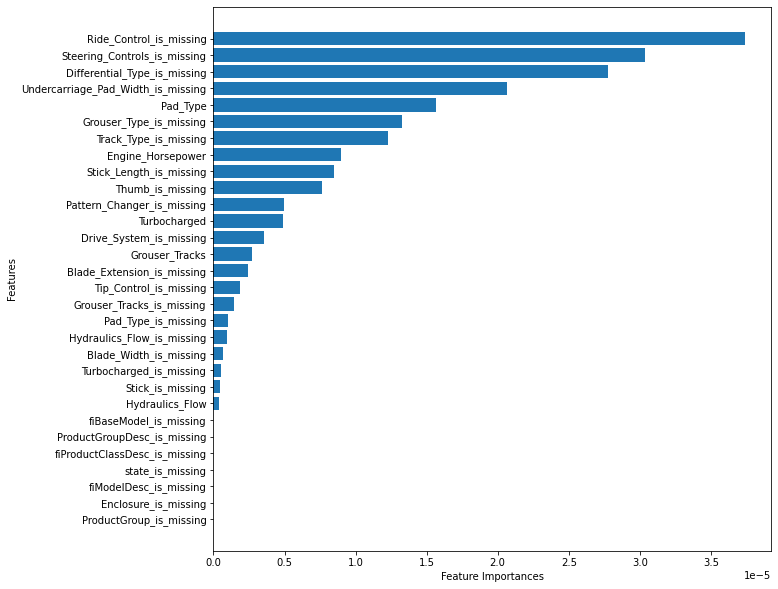

In [84]:
plot_features(X_train.columns, ideal_model.feature_importances_)